In [1]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Asus\\Downloads\\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.shape

(400, 5)

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i]=le.fit_transform(df[i])
df.head() # male :1 , d=female :0

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
x=df[['User ID','Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [11]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [12]:
print(x)

[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.52039175 -0.98019606  1.17910958 -1.46068138]
 [ 0.88695546  1.02020406 -0.15807423 -1.07893824]
 [-1.36231017 -0.98019606  1.08359645 -0.99084367]]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

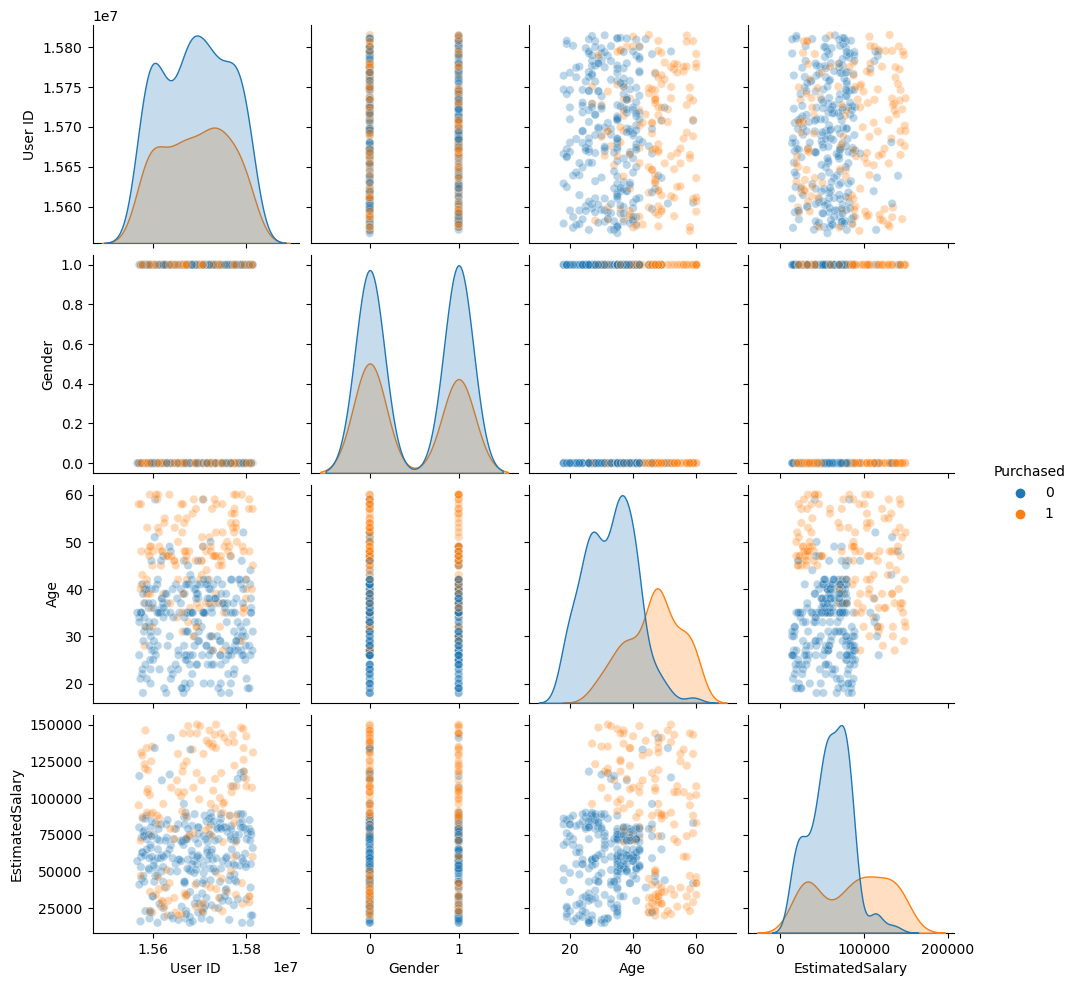

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=df, kind="scatter", plot_kws={"alpha": 0.3}, hue='Purchased')
plt.show()

In [15]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred=svm_clf.predict(x_test)

In [17]:
x_test

array([[ 0.08221811, -0.98019606,  0.79705706, -1.40195167],
       [-1.14394653, -0.98019606,  2.03872775,  0.53612887],
       [ 1.19037025, -0.98019606, -0.92217926, -0.75592482],
       [ 0.46104297, -0.98019606,  0.98808332,  0.77104772],
       [ 0.10820713, -0.98019606, -0.82666613, -1.22576253],
       [ 1.49673326, -0.98019606, -0.73115301, -0.2273574 ],
       [-0.72606828, -0.98019606,  0.89257019,  1.09406114],
       [ 1.33372902, -0.98019606, -0.82666613,  0.38930459],
       [ 0.41990766,  1.02020406,  0.22397829,  0.15438573],
       [-1.12812956,  1.02020406,  0.41500455, -0.13926283],
       [ 0.49981691, -0.98019606, -0.25358736, -0.13926283],
       [ 1.21967077, -0.98019606,  1.46564897, -1.04957339],
       [ 1.17400835, -0.98019606, -1.39974491, -0.63846539],
       [-1.3457247 , -0.98019606, -1.6862843 , -1.37258681],
       [ 0.47674816,  1.02020406, -0.73115301,  0.50676401],
       [ 1.13538811,  1.02020406, -0.25358736,  1.123426  ],
       [-1.09720822, -0.

In [18]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [19]:
svm_clf.predict([[-1.14394653,-0.98019606,2.03872775,0.53612887]])

array([1], dtype=int64)

In [20]:
svm_clf.predict([[1.19037025,-0.98019606,-0.92217926,-0.75592482]])

array([0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
print('Performance of the testing dataset:- ',svm_clf.score(x_test,y_test)*100,'%')
print('Performance of the training dataset:- ',svm_clf.score(x_train,y_train)*100,'%')

Performance of the testing dataset:-  86.25 %
Performance of the training dataset:-  82.5 %


In [23]:
print('Accuracy Score:- ',accuracy_score(y_test,y_pred)*100,'%')

Accuracy Score:-  86.25 %


In [24]:
print('Classification Report:- ',classification_report(y_test,y_pred))

Classification Report:-                precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [25]:
print('Confusion Matrix:- ',confusion_matrix(y_test,y_pred))

Confusion Matrix:-  [[50  2]
 [ 9 19]]
